# A Basic Model for Machine Learning

## This exercise gives a brief overview of creating and using a machine learning model

The basic model has the follwoing steps:
    1. Import and understand the data that you are going to work with. Understand the problem at hand.
    2. Prepare the data for building the model.
    3. Create and build the machine learning model.
    4. Visualize the results
    5. Measure the performance of the model.
    

### Step 1: Import and understand the data. Understand the problem.

In [32]:
#KUSHANK Try (by logistic regression and by Decision Tree)
# Import appropriate machine learning library. This example uses Decision Tree Model.
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Import pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zoo_data = pd.read_csv(r"F:\Masters- BITS Pilani\BITS Courses\Machine Learning\Class1 - ppt\zoo.csv")

In [3]:
zoo_data.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_data.shape
#101 training examples

(101, 18)

In [7]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
# i believe class_type we might need to predict
zoo_data["class_type"].unique() 
#there are assumingly 7 classes

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [30]:
# sns.heatmap(zoo_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#fully populated data

In [29]:
# 1) Binary variables ( 0 or 1) - hair , feathers ,eggs,milk , air
for i in list(set(list(zoo_data.columns)) - set(['animal_name'])):
    print(zoo_data[i].value_counts())

0    81
1    20
Name: feathers, dtype: int64
1    80
0    21
Name: breathes, dtype: int64
1    75
0    26
Name: tail, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
0    60
1    41
Name: milk, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    56
0    45
Name: predator, dtype: int64
0    57
1    44
Name: catsize, dtype: int64
0    84
1    17
Name: fins, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    58
1    43
Name: hair, dtype: int64
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64
1    83
0    18
Name: backbone, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_8348\3241870237.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = zoo_data.loc[:,zoo_data.columns != "class_type"].corr()


<Axes: >

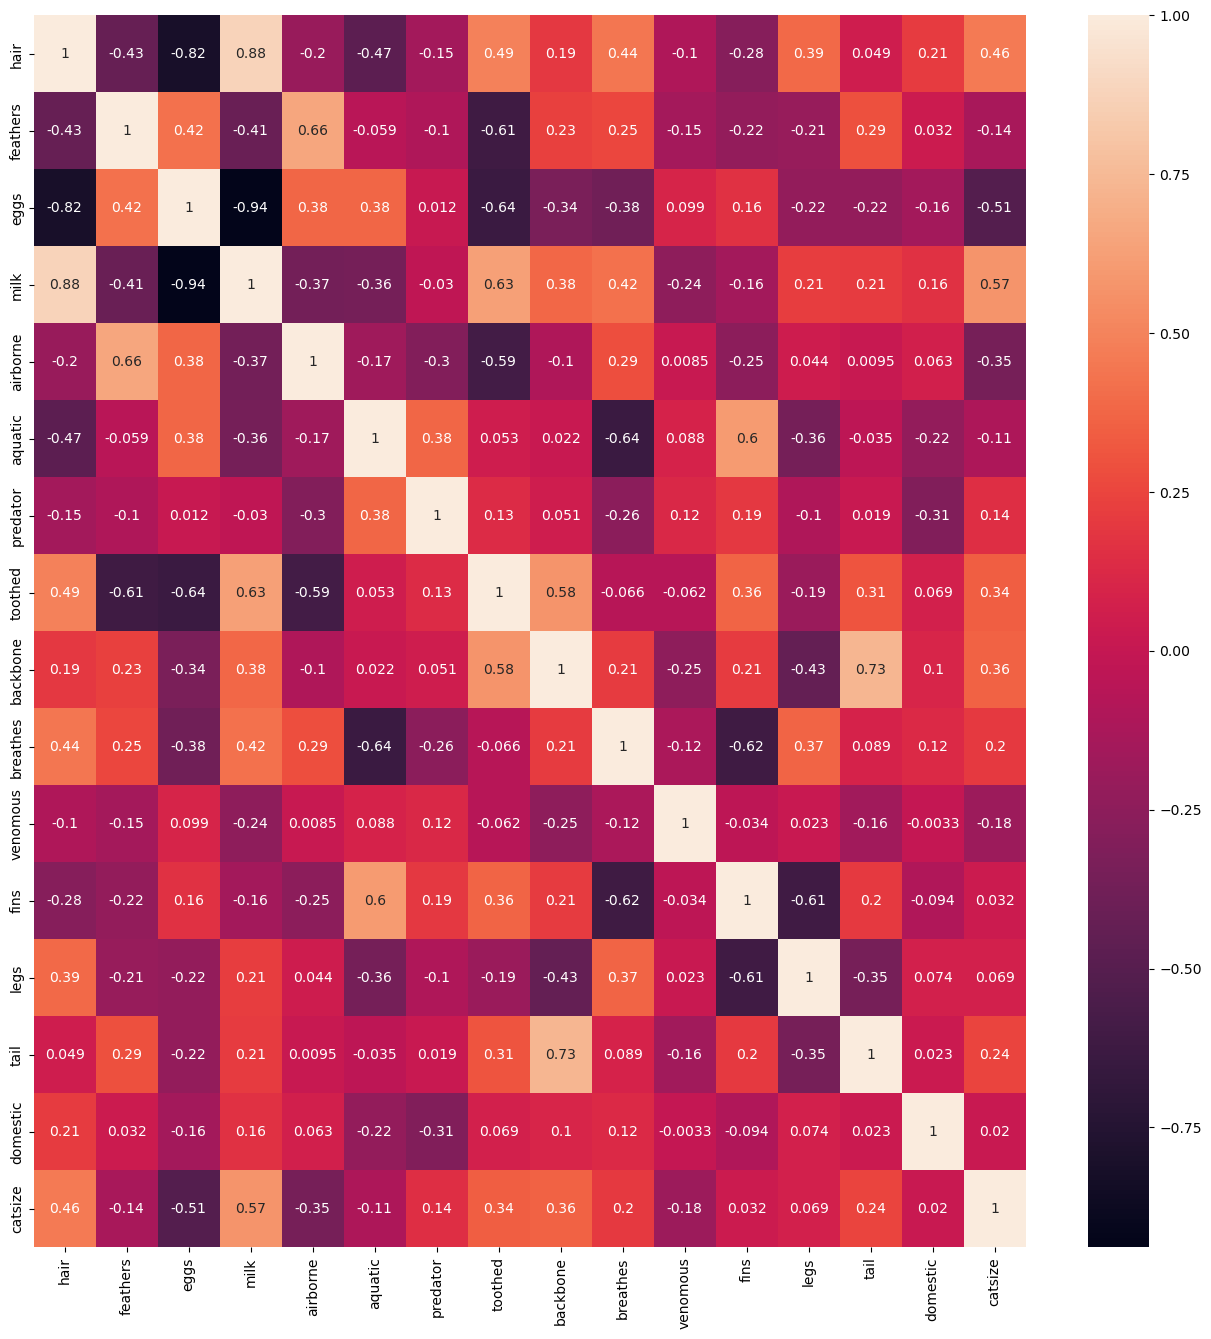

In [40]:
cor = zoo_data.loc[:,zoo_data.columns != "class_type"].corr()
plt.figure(figsize = (16,16))
sns.heatmap(cor,annot=True)                #heatmap can be used to find missing values as well    
#highly negatively correlated variable milk and eggs will drop one.

In [43]:
y = zoo_data["class_type"]
X = zoo_data.loc[:,(zoo_data.columns != "class_type") & (zoo_data.columns != "milk") & (zoo_data.columns != "animal_name")]

In [45]:
X.head(2)

,hair,feathers,eggs,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,0,0,0,1,1,1,0,0,4,1,0,1


In [48]:
# test - train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(penalty=None,multi_class='multinomial', solver='lbfgs') #one vs all classification we must use liblinear as a solver

In [57]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[6 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 3]]


In [61]:
y_test.value_counts().sum()

21

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9523809523809523

In [65]:
20/21

0.9523809523809523

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [70]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
dtree.predict(X_test)

array([2, 1, 1, 2, 3, 4, 2, 7, 4, 1, 1, 2, 2, 2, 1, 1, 7, 7, 5, 6, 2],
      dtype=int64)

In [72]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [80]:
!pip install six

In [83]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [87]:
!pip install pydotplus
!pip install graphviz

                                              0.0/278.7 kB ? eta -:--:--
     --------------------------             194.6/278.7 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=fff38d407f8c9f4f37cd6e5d4e362c05e00f7ac3fe519455419df5fe0a260406
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
                                              0.0/47.1 kB ? eta -:--:--
     ----------------------------------       41.0/47.1 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00


In [90]:
from IPython.display import Image  

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

FileNotFoundError: [WinError 2] "dot" not found in path.

In [77]:
# Import the dataset ( Zoo dataset downloaded from Kaggle)

dataset = pd.read_csv(r'F:\Masters- BITS Pilani\BITS Courses\Machine Learning\Class1 - ppt\zoo.csv')

# check the size of the dataset

dataset.shape

(101, 18)

The Zoo dataset (https://www.kaggle.com/uciml/zoo-animal-classification)

This dataset consists of 101 animals from a zoo.

There are 16 features or attributes with various traits to describe the animals: animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone,     breathes, venomous, fins, legs, tail, domestic, catsize.

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

In [3]:
# view first few rows of the dataset

dataset.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Step 2. Prepare the data

In [4]:
# The first column which are names of the animals is not a fature that can used.
# Extract the column and save for later.

animal_names = dataset['animal_name'].tolist()

# Drop the first column which are the animal names

dataset=dataset.drop('animal_name',axis=1)

In [5]:
# Add a line here to view the modified dataset
# Hint: Refer to previous section.

In [6]:
# A machine learning project uses a training set to train the model,
# and a testing set to test the model.
# Both training set and testing set are taken from the available dataset.
# The given dataset is split into two  parts - training and testing set, in a ratio.


from sklearn.model_selection import train_test_split

# copy all columns excluding last column
X = dataset.loc[:, dataset.columns != 'class_type']

# copy the last column only
Y = dataset['class_type']

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, stratify=Y, test_size= 0.3)

# The dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size.
# In this example test_size=0.3 says that 30 % of  observations are used for testing
# and rest 70 % observations are used for training.

# randam_state is the seed for the random number generator.
X_train.shape

(70, 16)

# Step 3. Create and build the machine learning model

In [7]:
# The model we are choosing is a Decision Tree model.

# Create the model
model = DecisionTreeClassifier()


In [8]:
# Train the model

model.fit(X_train, Y_train)

# This prints the summary of the model that has been used.
# The defualt parameter values are also listed.

DecisionTreeClassifier()

In [9]:
# Predict the values for testing set

Y_predict = model.predict(X_test)

### Step 4. Visualize the results

In [10]:
# To visualize this model, the feature names and class names are essential.

# extract the feature names
feature_names = list(dataset.columns.values)

# drop the last column name
feature_names = feature_names[:-1]
feature_names

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize']

In [11]:
# extact the class names
class_int = dataset['class_type'].unique().tolist()

class_names = ['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']

# map the class names to the class number as specified in the dataset

dictionary = dict(zip(class_names, class_int))
dictionary


{'Mammal': 1,
 'Fish': 4,
 'Bird': 2,
 'Invertebrate': 7,
 'Bug': 6,
 'Amphibian': 5,
 'Reptile': 3}

In [15]:
!pip install pydotplus 

In [94]:
# Vizualize the tree

# set the path to graphviz
import os  # Windows OS
os.environ["PATH"] += os.pathsep + r'C:\Users\hp\Downloads\windows_10_cmake_Release_Graphviz-11.0.0-win64\Graphviz-11.0.0-win64\include\graphviz' # Windows OS


# import the necessary libraries

#from sklearn.externals.six import StringIO
from io import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# may need to install
# pip install pydotplus

dot_data = StringIO()
feature_names = list(X_train.columns)

export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = y_train,
                proportion = False, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

TypeError: can only concatenate str (not "numpy.int64") to str

### Step 5. Measure the performance of the model

In [ ]:
# Accuracy of the machine learning model

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_predict)
print(acc * 100 , "%")

In [ ]:
# Build the confusion matrix
# Confusion matrix is build from the actual test_targets to the predicted test_predict.

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_predict)
print('Confusion Matrix :')
print(conf_matrix)

Exercise.

1. Identify another machine learning model from the sklearn library.
2. Apply the above steps to the identified model appropriately and measure its performance.
3. Compare the two models (model of this exercise and the identified model).